In [1]:
#RNN MODEL

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.model_selection import train_test_split

# Load your dataset (adjust file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for RNN (samples, timesteps, features)
TIME_STEPS = 10  # Window size
def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_mae = model_rnn.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Predict the RUL for test data
y_pred = model_rnn.predict(X_test)

# Example of comparing predicted vs actual values



Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 165081.3906 - mae: 280.4235 - val_loss: 6611.5425 - val_mae: 36.0597
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7388.7622 - mae: 29.4550 - val_loss: 5555.5630 - val_mae: 26.6945
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6964.6382 - mae: 30.4167 - val_loss: 11852.3809 - val_mae: 83.3501
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6958.1050 - mae: 33.0207 - val_loss: 5156.5610 - val_mae: 27.2747
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6625.6294 - mae: 29.2977 - val_loss: 4837.0435 - val_mae: 25.8733
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6165.4844 - mae: 30.0170 - val_loss: 10346.2266 - val_mae: 75.7191
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5816.7368 - mae: 33.1308 - val_loss: 4466.2651 - val_mae: 24.4728
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5523.4624 - mae: 27.4613 - val_loss: 4096.4048 - val_mae: 22.858

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data
y_pred = model_rnn.predict(X_test)

# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 1649.1392
Mean Absolute Error (MAE): 22.9055
Root Mean Squared Error (RMSE): 40.6096
Accuracy (within 10% tolerance): 88.04%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 174.76
Actual: 445.00, Predicted: 433.20
Actual: 349.00, Predicted: 336.79
Actual: 515.00, Predicted: 492.14
Actual: 827.00, Predicted: 763.66
Actual: 929.00, Predicted: 894.35
Actual: 1008.00, Predicted: 974.01
Actual: 273.00, Predicted: 249.80
Actual: 74.00, Predicted: 67.35
Actual: 341.00, Predicted: 328.43


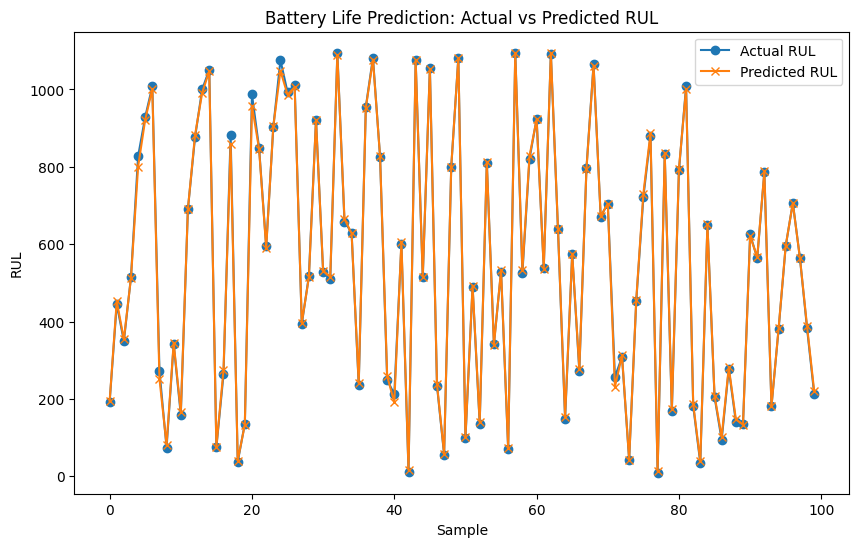

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual RUL', marker='o')
plt.plot(y_pred[:100], label='Predicted RUL', marker='x')
plt.title('Battery Life Prediction: Actual vs Predicted RUL')
plt.xlabel('Sample')
plt.ylabel('RUL')
plt.legend()
plt.show()

In [5]:
#LSTM MODEL

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Load your dataset (adjust file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with the actual path to your dataset

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for LSTM (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_lstm.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_lstm.predict(X_test).flatten()


Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 369646.7188 - mae: 516.8508 - val_loss: 189456.7500 - val_mae: 355.6767
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 157340.3438 - mae: 326.7499 - val_loss: 103545.7031 - val_mae: 275.3435
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 105361.3594 - mae: 281.7024 - val_loss: 102481.4609 - val_mae: 274.3616
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102372.6016 - mae: 276.8172 - val_loss: 102693.5781 - val_mae: 274.7706
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 105679.0391 - mae: 282.5186 - val_loss: 102577.0234 - val_mae: 274.5818
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 105509.0234 - mae: 282.5782 - val_loss: 102632.2812 - val_mae: 274.6751
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103511.4062 - mae: 279.1577 - val_loss: 97081.0312 - val_mae: 267.0005
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 67888.1797 - mae: 207.7011 -

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data


# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


Mean Squared Error (MSE): 62.3645
Mean Absolute Error (MAE): 5.1691
Root Mean Squared Error (RMSE): 7.8971
Accuracy (within 10% tolerance): 95.38%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 194.60
Actual: 445.00, Predicted: 456.08
Actual: 349.00, Predicted: 355.59
Actual: 515.00, Predicted: 515.81
Actual: 827.00, Predicted: 803.09
Actual: 929.00, Predicted: 923.74
Actual: 1008.00, Predicted: 1011.24
Actual: 273.00, Predicted: 255.74
Actual: 74.00, Predicted: 73.17
Actual: 341.00, Predicted: 346.97


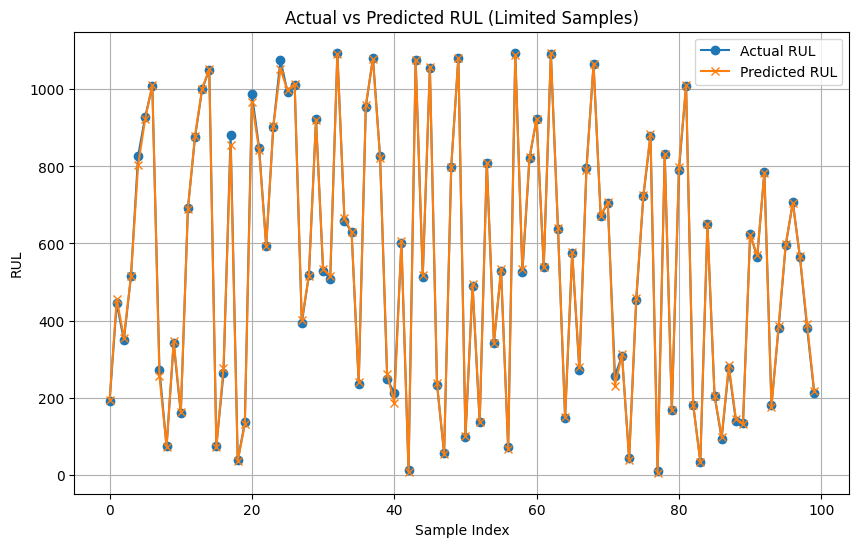

In [8]:
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#BI-LSTM

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for LSTM (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the Bidirectional LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_bilstm.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_bilstm.predict(X_test).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics



Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 352379.8438 - mae: 501.1556 - val_loss: 143879.5938 - val_mae: 314.4277
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 127683.9141 - mae: 301.5567 - val_loss: 102542.0156 - val_mae: 274.3761
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 103903.9375 - mae: 279.1334 - val_loss: 102808.7891 - val_mae: 274.9388
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 105700.9688 - mae: 283.1395 - val_loss: 102523.2656 - val_mae: 274.4795
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 103110.6250 - mae: 278.1386 - val_loss: 102368.4375 - val_mae: 274.1861
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 100169.6875 - mae: 272.2694 - val_loss: 31258.3555 - val_mae: 133.5234
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 16508.5020 - mae: 80.6801 - val_loss: 3006.3059 - val_mae: 22.8450
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1845.4148 - mae: 21.9618 - val_lo

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data
y_pred = model_bilstm.predict(X_test)

# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 62.1618
Mean Absolute Error (MAE): 5.1948
Root Mean Squared Error (RMSE): 7.8843
Accuracy (within 10% tolerance): 95.75%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 192.82
Actual: 445.00, Predicted: 456.35
Actual: 349.00, Predicted: 354.08
Actual: 515.00, Predicted: 516.39
Actual: 827.00, Predicted: 805.96
Actual: 929.00, Predicted: 925.75
Actual: 1008.00, Predicted: 1007.08
Actual: 273.00, Predicted: 251.62
Actual: 74.00, Predicted: 75.34
Actual: 341.00, Predicted: 346.52


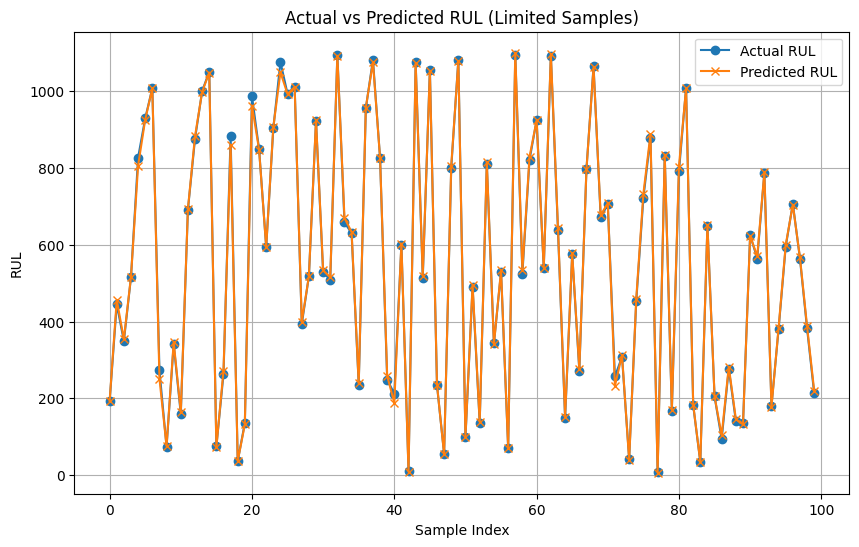

In [60]:
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# GRU MODEL

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for GRU (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_gru.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_gru.predict(X_test).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics



Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 371568.3125 - mae: 518.9291 - val_loss: 208674.3281 - val_mae: 373.1134
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 169784.5625 - mae: 336.6156 - val_loss: 104675.8984 - val_mae: 276.4915
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 106483.7656 - mae: 283.0038 - val_loss: 102484.5234 - val_mae: 274.3773
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 103844.9219 - mae: 279.6771 - val_loss: 102602.0312 - val_mae: 274.6238
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 104873.5391 - mae: 281.5400 - val_loss: 102495.8438 - val_mae: 274.4112
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 103027.2500 - mae: 278.1051 - val_loss: 97797.6406 - val_mae: 267.8389
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 62491.0664 - mae: 191.0706 - val_loss: 3837.7361 - val_mae: 36.1437
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2625.1245 - mae: 31.2488 - val_l

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data
y_pred = model_gru.predict(X_test)

# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 87.2610
Mean Absolute Error (MAE): 6.3473
Root Mean Squared Error (RMSE): 9.3414
Accuracy (within 10% tolerance): 91.53%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 200.01
Actual: 445.00, Predicted: 450.20
Actual: 349.00, Predicted: 352.01
Actual: 515.00, Predicted: 506.47
Actual: 827.00, Predicted: 799.81
Actual: 929.00, Predicted: 924.16
Actual: 1008.00, Predicted: 1007.98
Actual: 273.00, Predicted: 253.29
Actual: 74.00, Predicted: 85.20
Actual: 341.00, Predicted: 343.67


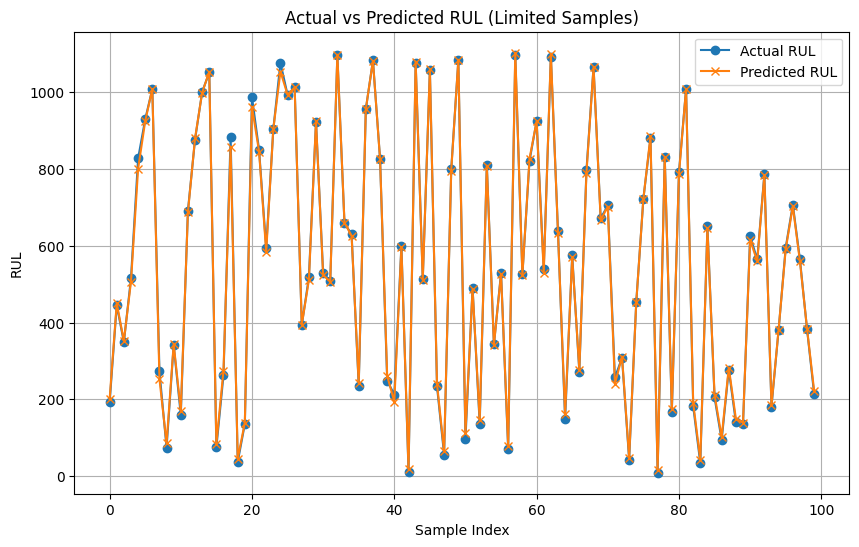

In [16]:
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#BI GRU MODEL

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path as needed)
data = pd.read_csv('dataset.csv')  # Replace with your actual file path

# Feature selection: Drop 'RUL' for input features
X = data.drop('RUL', axis=1).values
y = data['RUL'].values

# Normalize features (MinMax scaling between 0 and 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data into time series format for BiGRU (samples, timesteps, features)
TIME_STEPS = 10  # Window size

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the BiGRU model
model_bigru = Sequential()
model_bigru.add(Bidirectional(GRU(64, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bigru.add(Dense(32, activation='relu'))
model_bigru.add(Dense(1))  # Output layer for RUL prediction

# Compile the model
model_bigru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_bigru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_mae = model_bigru.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Predict the RUL for the test data
y_pred = model_bigru.predict(X_test).flatten()


Epoch 1/50


C:\Users\saravanan013\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 349924.1562 - mae: 498.7061 - val_loss: 126281.2656 - val_mae: 297.7436
Epoch 2/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 115886.3906 - mae: 291.0444 - val_loss: 102517.3125 - val_mae: 274.3548
Epoch 3/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 103568.5000 - mae: 278.7698 - val_loss: 102503.9453 - val_mae: 274.4321
Epoch 4/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 102723.3125 - mae: 277.4042 - val_loss: 101106.6484 - val_mae: 272.4714
Epoch 5/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 72602.0781 - mae: 212.9133 - val_loss: 2921.2078 - val_mae: 34.2026
Epoch 6/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1985.0127 - mae: 27.1395 - val_loss: 391.8246 - val_mae: 11.9753
Epoch 7/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 388.6645 - mae: 12.9526 - val_loss: 162.7061 - val_mae: 8.6186
Epoch 8/50
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 173.1338 - mae: 9.1792 - val_loss: 151.3140 - 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the RUL for the test data


# Flatten the predictions and actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Calculate standard performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
tolerance = 0.10  # 10% tolerance
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
accuracy = accurate_predictions / len(y_test) * 100

# Print all performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

# Optional: Print the first 10 predictions vs actual values for inspection
print('\nSample Predictions vs Actual Values:')
for i in range(10):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


Mean Squared Error (MSE): 75.2609
Mean Absolute Error (MAE): 5.8598
Root Mean Squared Error (RMSE): 8.6753
Accuracy (within 10% tolerance): 94.65%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 186.71
Actual: 445.00, Predicted: 447.33
Actual: 349.00, Predicted: 345.15
Actual: 515.00, Predicted: 506.82
Actual: 827.00, Predicted: 803.80
Actual: 929.00, Predicted: 929.36
Actual: 1008.00, Predicted: 1016.00
Actual: 273.00, Predicted: 244.26
Actual: 74.00, Predicted: 78.15
Actual: 341.00, Predicted: 337.31


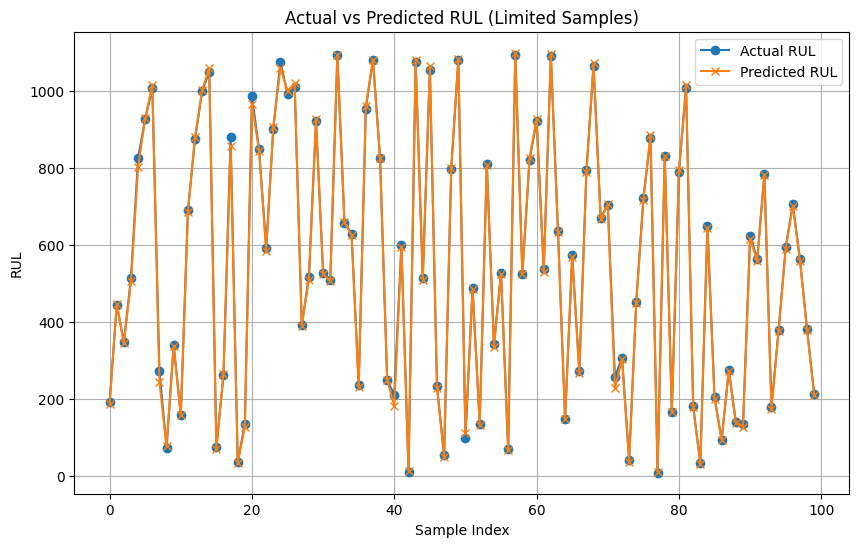

In [20]:
# Limit the data to the first 100 samples for plotting
num_samples = 100
y_test_limited = y_test[:num_samples]
y_pred_limited = y_pred[:num_samples]

# Plot Actual vs. Predicted values for the limited data
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited, label='Actual RUL', marker='o')
plt.plot(y_pred_limited, label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (Limited Samples)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Initialize a dictionary to store performance metrics for all models
performance_metrics = {}

# Function to update the metrics dictionary for each model
def update_metrics(model_name, mse, mae, rmse, accuracy):
    performance_metrics[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "Accuracy": accuracy
    }

# Function to calculate and store performance metrics
def evaluate_and_store_metrics(model, model_name, X_test, y_test):
    # Predict the RUL for the test data
    y_pred = model.predict(X_test)

    # Flatten the predictions and actual values
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()

    # Calculate standard performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error

    # Define a custom accuracy metric (percentage of predictions within 10% tolerance of actual value)
    tolerance = 0.10  # 10% tolerance
    accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance * y_test)
    accuracy = accurate_predictions / len(y_test) * 100

    # Add the metrics to the dictionary
    update_metrics(model_name, mse, mae, rmse, accuracy)

    # Print all performance metrics for the current model
    print(f'{model_name} Performance Metrics:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'Accuracy (within 10% tolerance): {accuracy:.2f}%')

    # Optional: Print the first 10 predictions vs actual values for inspection
    print('\nSample Predictions vs Actual Values:')
    for i in range(10):
        print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}')


In [22]:
# Example of evaluating and storing metrics for each model

# Model 1: RNN
evaluate_and_store_metrics(model_rnn, "RNN", X_test, y_test)





95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RNN Performance Metrics:
Mean Squared Error (MSE): 1649.1392
Mean Absolute Error (MAE): 22.9055
Root Mean Squared Error (RMSE): 40.6096
Accuracy (within 10% tolerance): 88.04%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 174.76
Actual: 445.00, Predicted: 433.20
Actual: 349.00, Predicted: 336.79
Actual: 515.00, Predicted: 492.14
Actual: 827.00, Predicted: 763.66
Actual: 929.00, Predicted: 894.35
Actual: 1008.00, Predicted: 974.01
Actual: 273.00, Predicted: 249.80
Actual: 74.00, Predicted: 67.35
Actual: 341.00, Predicted: 328.43


In [23]:
evaluate_and_store_metrics(model_lstm, "LSTM", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Performance Metrics:
Mean Squared Error (MSE): 66.3705
Mean Absolute Error (MAE): 5.0035
Root Mean Squared Error (RMSE): 8.1468
Accuracy (within 10% tolerance): 95.95%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 189.84
Actual: 445.00, Predicted: 447.41
Actual: 349.00, Predicted: 346.06
Actual: 515.00, Predicted: 507.65
Actual: 827.00, Predicted: 805.91
Actual: 929.00, Predicted: 926.59
Actual: 1008.00, Predicted: 1010.46
Actual: 273.00, Predicted: 244.96
Actual: 74.00, Predicted: 75.79
Actual: 341.00, Predicted: 338.84


In [56]:
evaluate_and_store_metrics(model_bilstm, "BILSTM", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
BILSTM Performance Metrics:
Mean Squared Error (MSE): 62.1618
Mean Absolute Error (MAE): 5.1948
Root Mean Squared Error (RMSE): 7.8843
Accuracy (within 10% tolerance): 95.75%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 192.82
Actual: 445.00, Predicted: 456.35
Actual: 349.00, Predicted: 354.08
Actual: 515.00, Predicted: 516.39
Actual: 827.00, Predicted: 805.96
Actual: 929.00, Predicted: 925.75
Actual: 1008.00, Predicted: 1007.08
Actual: 273.00, Predicted: 251.62
Actual: 74.00, Predicted: 75.34
Actual: 341.00, Predicted: 346.52


In [25]:
evaluate_and_store_metrics(model_gru, "GRU", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
GRU Performance Metrics:
Mean Squared Error (MSE): 87.2610
Mean Absolute Error (MAE): 6.3473
Root Mean Squared Error (RMSE): 9.3414
Accuracy (within 10% tolerance): 91.53%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 200.01
Actual: 445.00, Predicted: 450.20
Actual: 349.00, Predicted: 352.01
Actual: 515.00, Predicted: 506.47
Actual: 827.00, Predicted: 799.81
Actual: 929.00, Predicted: 924.16
Actual: 1008.00, Predicted: 1007.98
Actual: 273.00, Predicted: 253.29
Actual: 74.00, Predicted: 85.20
Actual: 341.00, Predicted: 343.67


In [26]:
evaluate_and_store_metrics(model_bigru, "BIGRU", X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
BIGRU Performance Metrics:
Mean Squared Error (MSE): 75.2609
Mean Absolute Error (MAE): 5.8598
Root Mean Squared Error (RMSE): 8.6753
Accuracy (within 10% tolerance): 94.65%

Sample Predictions vs Actual Values:
Actual: 192.00, Predicted: 186.71
Actual: 445.00, Predicted: 447.33
Actual: 349.00, Predicted: 345.15
Actual: 515.00, Predicted: 506.82
Actual: 827.00, Predicted: 803.80
Actual: 929.00, Predicted: 929.36
Actual: 1008.00, Predicted: 1016.00
Actual: 273.00, Predicted: 244.26
Actual: 74.00, Predicted: 78.15
Actual: 341.00, Predicted: 337.31


In [62]:
best_model_name = None
best_model_score = float('inf')  # We start by assuming the best score is infinity (to minimize)

# Compare models based on RMSE (you can adjust to compare based on another metric like MSE, etc.)
for model_name, metrics in performance_metrics.items():
    print(f"\nComparing {model_name}:")
    print(f"MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, Accuracy: {metrics['Accuracy']:.2f}%")
    
    # Example comparison based on RMSE (lower RMSE is better)
    if metrics['RMSE'] < best_model_score:
        best_model_score = metrics['RMSE']
        best_model_name = model_name

print(f"\nThe best model based on RMSE is: {best_model_name} with RMSE: {best_model_score:.4f}")


Comparing RNN:
MSE: 1649.1392, MAE: 22.9055, RMSE: 40.6096, Accuracy: 88.04%

Comparing LSTM:
MSE: 66.3705, MAE: 5.0035, RMSE: 8.1468, Accuracy: 95.95%

Comparing BILSTM:
MSE: 62.1618, MAE: 5.1948, RMSE: 7.8843, Accuracy: 95.75%

Comparing GRU:
MSE: 87.2610, MAE: 6.3473, RMSE: 9.3414, Accuracy: 91.53%

Comparing BIGRU:
MSE: 75.2609, MAE: 5.8598, RMSE: 8.6753, Accuracy: 94.65%

The best model based on RMSE is: BILSTM with RMSE: 7.8843
